<a href="https://colab.research.google.com/github/davidjcox333/GlimpseK12/blob/master/Morgan_Prediction_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Morgan County 2019-2020 Final Scores

In [1]:
# Packages!
import os
import sys
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving Morgan19_20.csv to Morgan19_20.csv
Saving Morgan18_19.csv to Morgan18_19.csv
Saving Morgan17_18.csv to Morgan17_18.csv


In [2]:
# Reading in data
#data16 = pd.read_csv('Morgan16_17.csv', low_memory=True)
data17 = pd.read_csv('Morgan17_18.csv', low_memory=True)
data18 = pd.read_csv('Morgan18_19.csv', low_memory=True)
data19 = pd.read_csv('Morgan19_20.csv', low_memory=True)

#df16 = data16.copy()
df17 = data17.copy()
df18 = data18.copy()
df19 = data19.copy()

#df16_cols = list(df16)
df17_cols = list(df17)
df18_cols = list(df18)
df19_cols = list(df19)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#%% Append year string to end of cols
#app_str = '_2016'
#df16_cols = [i + app_str for i in df16_cols]
app_str = '_2017'
df17_cols = [i + app_str for i in df17_cols]
app_str = '_2018'
df18_cols = [i + app_str for i in df18_cols]
app_str = '_2019'
df19_cols = [i + app_str for i in df19_cols]
  
#%% Assign new col lists as column headers
#df16.columns = df16_cols
df17.columns = df17_cols
df18.columns = df18_cols
df19.columns = df19_cols

In [4]:
#%% Rename GlimpsestudentId so it's consistent across all three dfs
#df16 = df16.rename(columns={'StudentStateIDNumber_2016':'GlimpsestudentId'})
df17 = df17.rename(columns={'GlimpsestudentId_2017':'GlimpsestudentId'})
df18 = df18.rename(columns={'GlimpsestudentId_2018':'GlimpsestudentId'})
df19 = df19.rename(columns={'GlimpseStudentId_2019':'GlimpsestudentId'})

#%% Save new column headers for loops down the road. 
#df16_cols = list(df16)
df17_cols = list(df17)
df18_cols = list(df18)
df19_cols = list(df19)

In [5]:
#%% Check to make sure adding the suffixes worked as planned. 
#print(df16.dtypes)
#print("\n")
print(df17.dtypes)
print("\n")
print(df18.dtypes)
print("\n")
print(df19.dtypes)

Course_2017                                object
Section_2017                               object
SectionShortName_2017                      object
TNUM_2017                                  object
GR_2017                                     int64
Year_2017                                   int64
School_2017                                object
Type_2017                                 float64
District_2017                               int64
GlimpsestudentId                          float64
ScantronMathPreTestBenchmarks_2017        float64
ScantronReadingPreTestBenchmarks_2017     float64
ScantronMathMidTestBenchmarks_2017        float64
ScantronReadingMidTestBenchmarks_2017     float64
ScantronMathPostTestBenchmarks_2017       float64
ScantronReadingPostTestBenchmarks_2017    float64
ScantronMathPreTest_2017                  float64
ScantronReadingPreTest_2017               float64
ScantronMathMidTest_2017                  float64
ScantronReadingMidTest_2017               float64


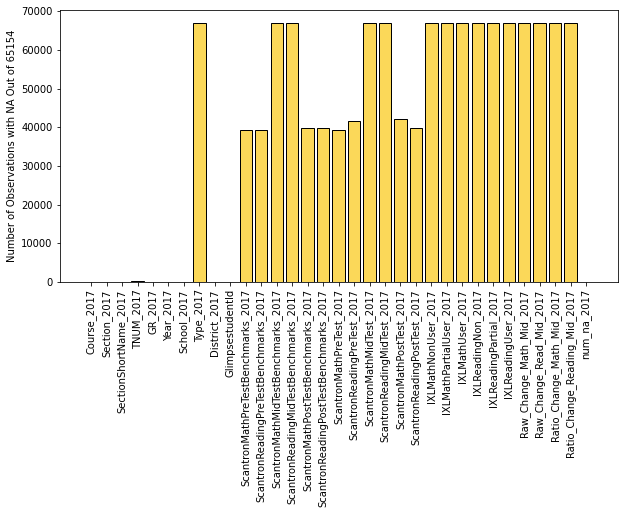

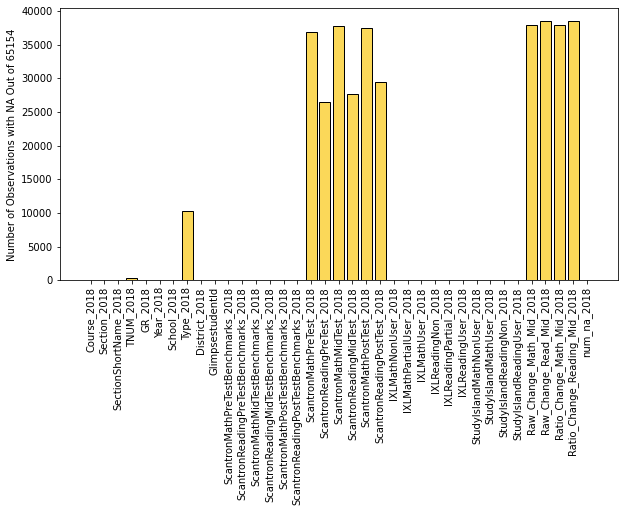

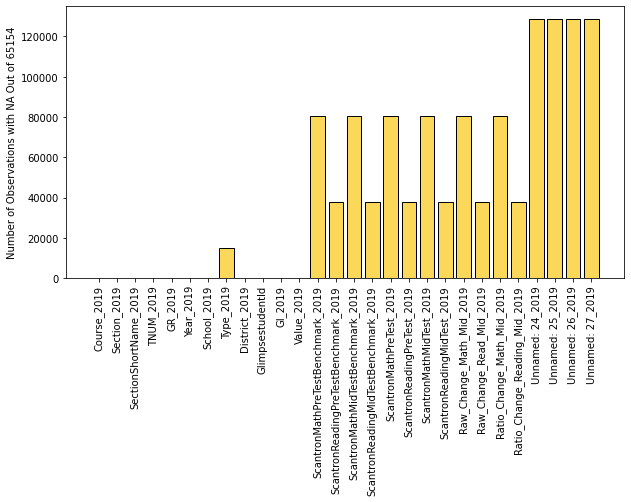

In [9]:
#%% Count the number of nan per feature. 
dfs = [df17, df18, df19] # Create list of the dfs

for d in dfs:
    # Count the number of missing vals per feature for current df
    df_cols = list(d)
    col_nan = []
    for c in df_cols:
        val = d[c].isna().sum()
        col_nan.append(val)
    
    # Plot it
    height = col_nan
    bars = df_cols
    y_pos = np.arange(len(bars))
    f, ax = plt.subplots(figsize=(10, 5))
    plt.bar(y_pos, height, color='#fbd827', edgecolor='black')
    plt.xticks(y_pos, bars, rotation=90) # Rotate the bar names
    plt.ylabel("Number of Observations with NA Out of %s" %len(df18))
    plt.show() # Show graphic

In [10]:
#%% Create different dfs for grade school versus high school
df17_grade = df17.loc[(df17['GR_2017'] < 9)]
print(df17_grade['GR_2017'].value_counts(), "\n") # Make sure it worked

#df17_high = df17.loc[(df17['GR_2017'] > 8)]
#df17_high['GR_2017'].value_counts() # Make sure it worked

df18_grade = df18.loc[(df18['GR_2018'] < 9)]
print("2018 Grade School\n", df18_grade['GR_2018'].value_counts(), "\n")

#df18_high = df18.loc[(df18['GR_2018'] > 8)]
#print("2018 High School\n", df18_high['GR_2018'].value_counts(), "\n") 

df19_grade = df19.loc[(df19['GR_2019'] < 9)]
print("2019 Grade School\n", df19_grade['GR_2019'].value_counts(), "\n")

#df19_high = df19.loc[(df19['GR_2019'] > 8)]
#print("2019 High School\n", df19_high['GR_2019'].value_counts(), "\n")

7    5672
4    5103
5    4946
6    4939
8    4933
3    4918
2    4886
1    4714
0    4538
Name: GR_2017, dtype: int64 

2018 Grade School
 7    5641
6    5220
8    5168
3    4971
5    4943
4    4743
1    4731
2    4495
0    4141
Name: GR_2018, dtype: int64 

2019 Grade School
 6    12739
5    12567
7    12034
8    10776
1     9207
4     8889
2     8789
3     8365
0      911
Name: GR_2019, dtype: int64 



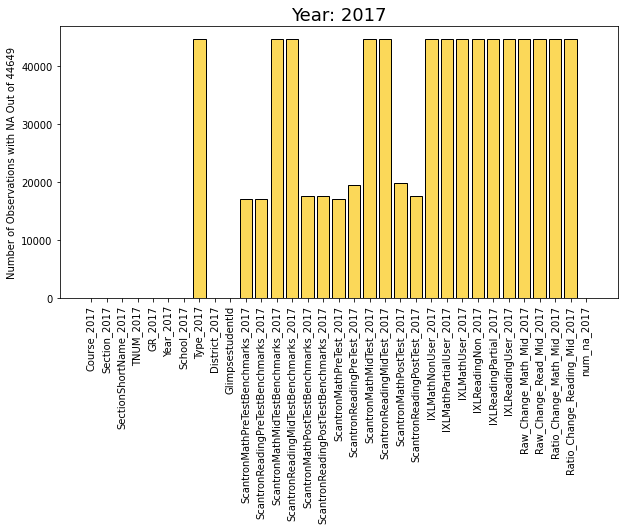

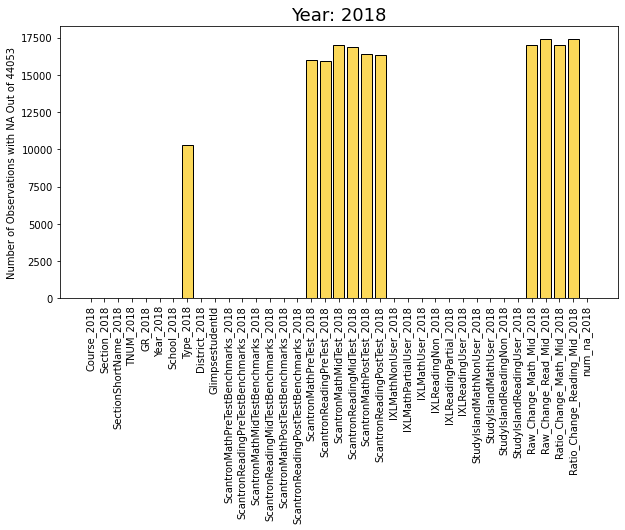

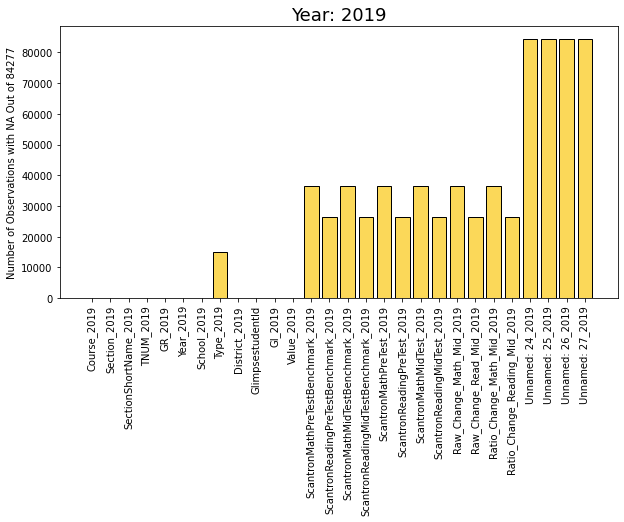

In [11]:
#%% Count the number of nan per feature. 
dfs = [df17_grade, df18_grade, df19_grade] # Create list of the dfs
year = 2017

for d in dfs:
    # Count the number of missing vals per feature for current df
    df_cols = list(d)
    col_nan = []
    for c in df_cols:
        val = d[c].isna().sum()
        col_nan.append(val)
    
    # Plot it
    height = col_nan
    bars = df_cols
    y_pos = np.arange(len(bars))
    f, ax = plt.subplots(figsize=(10, 5))
    plt.bar(y_pos, height, color='#fbd859', edgecolor='black')
    plt.xticks(y_pos, bars, rotation=90) # Rotate the bar names
    plt.ylabel("Number of Observations with NA Out of %s" %len(d))
    plt.title('Year: %s' %year, fontsize=18)
    plt.show() # Show graphic
    year += 1

## Cleaning the 2017 df

In [12]:
# Cols to drop
cols_drop = ['Type_2017', 'ScantronMathMidTestBenchmarks_2017', 'ScantronReadingMidTestBenchmarks_2017', \
             'ScantronMathMidTest_2017', 'ScantronReadingMidTest_2017', \
             'IXLMathNonUser_2017','IXLMathPartialUser_2017','IXLMathUser_2017',\
             'IXLReadingNon_2017','IXLReadingPartial_2017','IXLReadingUser_2017',\
             'Raw_Change_Math_Mid_2017','Raw_Change_Read_Mid_2017',\
             'Ratio_Change_Math_Mid_2017','Ratio_Change_Reading_Mid_2017',\
             'num_na_2017']

df17_grade = df17_grade.drop(cols_drop, axis=1)

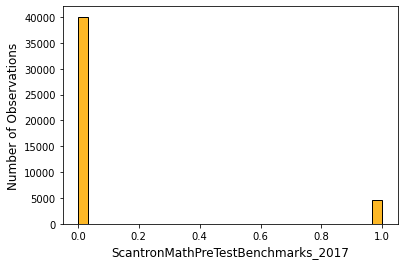

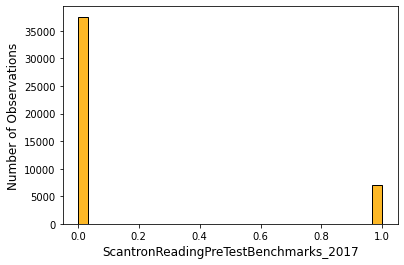

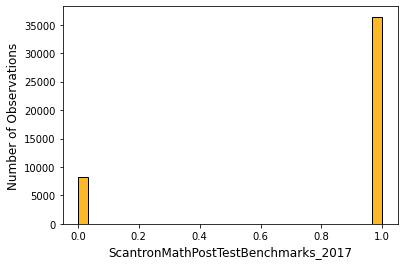

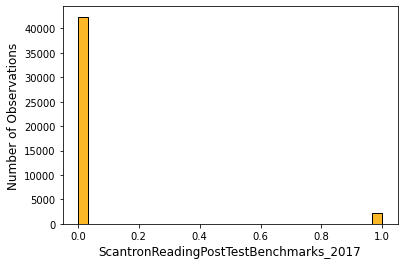

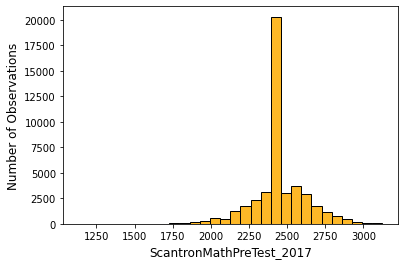

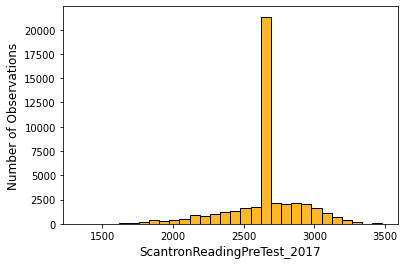

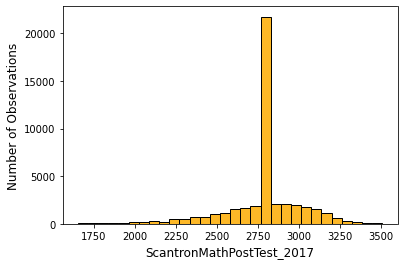

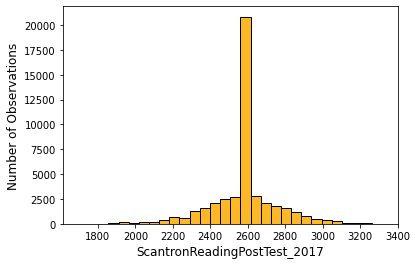

In [15]:
# Cols to fill
cols_keep = ['ScantronMathPreTestBenchmarks_2017','ScantronReadingPreTestBenchmarks_2017',\
             'ScantronMathPostTestBenchmarks_2017','ScantronReadingPostTestBenchmarks_2017',\
             'ScantronMathPreTest_2017','ScantronReadingPreTest_2017',\
             'ScantronMathPostTest_2017','ScantronReadingPostTest_2017']

for i in cols_keep:
    plt.hist(df17_grade[i], bins=30, color='#fdb827', edgecolor='black')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Number of Observations', fontsize=12)
    plt.show()

In [14]:
#%% Change cols based on mean, median, or some other value
vals_mean = ['ScantronMathPreTest_2017', 'ScantronReadingPostTest_2017', \
             'ScantronMathPreTestBenchmarks_2017', 'ScantronReadingPreTestBenchmarks_2017', \
             'ScantronMathPostTestBenchmarks_2017', 'ScantronReadingPostTestBenchmarks_2017']

for i in vals_mean:
    mean_val = round(df17_grade[i].mean())
    df17_grade[i] = df17_grade[i].fillna(mean_val)

vals_med = ['ScantronReadingPreTest_2017', 'ScantronMathPostTest_2017']
for i in vals_med:
    med_val = df17_grade[i].median()
    df17_grade[i] = df17_grade[i].fillna(med_val)

#df17_grade = df17_grade.dropna()

## Cleaning the 2018 df

In [16]:
#%% Cols to drop
#df18_grade = df18_grade.drop(['num_na_2018'], axis=1)

df_18_grade = df18_grade.dropna(subset=['ScantronMathPostTest_2018',\
                                        'ScantronReadingPostTest_2018'])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


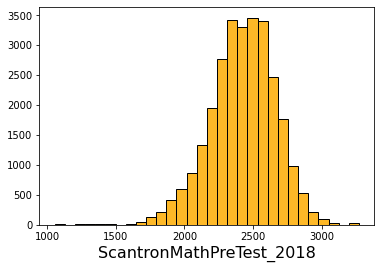

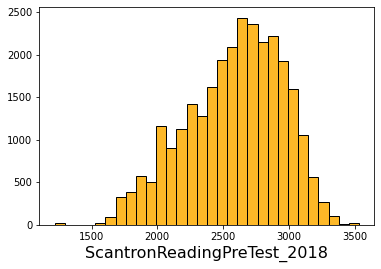

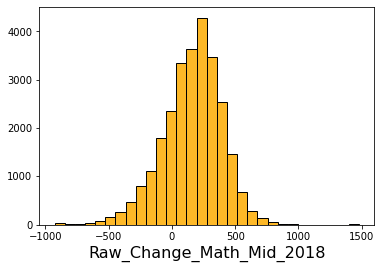

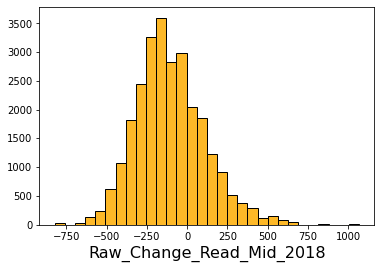

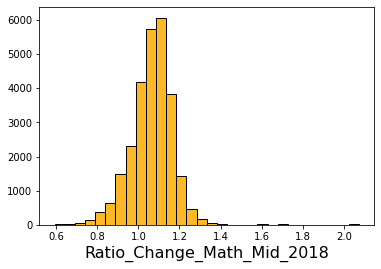

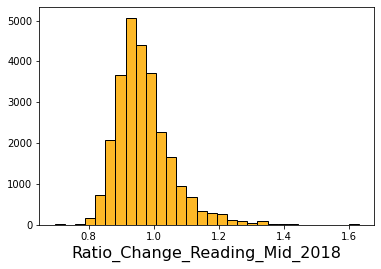

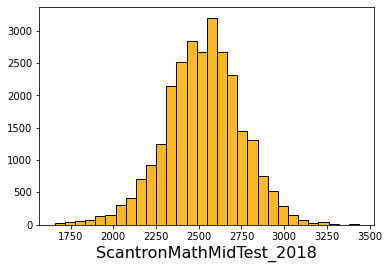

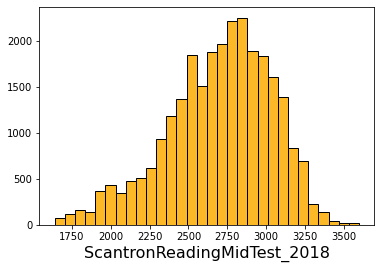

In [17]:
# Cols to fill  
cols_fill = ['ScantronMathPreTest_2018', 'ScantronReadingPreTest_2018', \
             'Raw_Change_Math_Mid_2018','Raw_Change_Read_Mid_2018',\
             'Ratio_Change_Math_Mid_2018','Ratio_Change_Reading_Mid_2018', \
             'ScantronMathMidTest_2018', 'ScantronReadingMidTest_2018']

# PLot the dsitributions so we know whether to impute the mean or median for each column
for i in cols_fill:
    plt.hist(df18_grade[i], bins=30, color='#fdb827', edgecolor='black')
    plt.xlabel(i, fontsize=16)
    plt.show()

In [18]:
#%% Impute val appropriate to distribution
vals_mean = ['Raw_Change_Read_Mid_2018', 'Ratio_Change_Math_Mid_2018', 'ScantronMathMidTest_2018']
for i in cols_fill:
    mean_val = round(df18_grade[i].mean())
    df18_grade[i] = df18_grade[i].fillna(mean_val)

med_vals = ['ScantronMathPreTest_2018', 'ScantronReadingPreTest_2018', \
            'Raw_Change_Read_Mid_2018', 'Ratio_Change_Reading_Mid_2018', \
            'ScantronReadingMidTest_2018']
for i in cols_fill:
    med_val = round(df18_grade[i].median())
    df18_grade[i] = df18_grade[i].fillna(med_val )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## Cleaning 2019 df

In [19]:
# Cols to drop
df19_grade = df19_grade.drop(['Type_2019', 'Unnamed: 24_2019','Unnamed: 25_2019',\
                              'Unnamed: 26_2019','Unnamed: 27_2019'], axis=1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


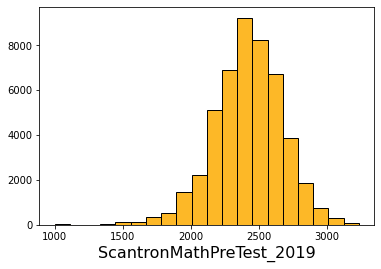

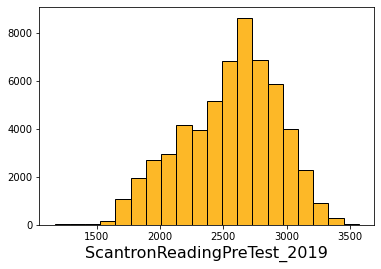

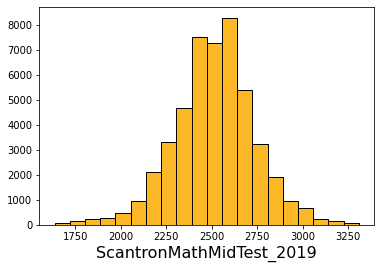

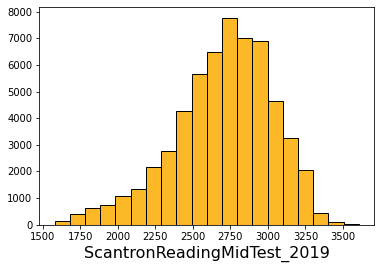

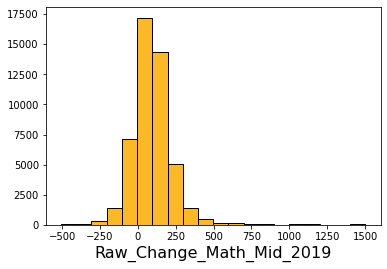

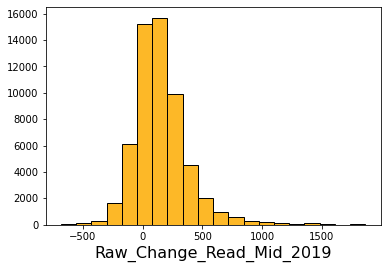

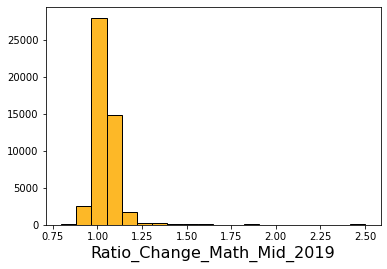

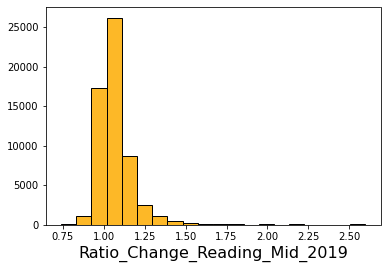

In [20]:
# Cols to fill
cols_fill = ['ScantronMathPreTest_2019','ScantronReadingPreTest_2019',\
             'ScantronMathMidTest_2019','ScantronReadingMidTest_2019',\
             'Raw_Change_Math_Mid_2019','Raw_Change_Read_Mid_2019',\
             'Ratio_Change_Math_Mid_2019','Ratio_Change_Reading_Mid_2019']

# PLot the dsitributions so we know whether to impute the mean or median for each column
for i in cols_fill:
    plt.hist(df19_grade[i], bins=20, color='#fdb827', edgecolor='black')
    plt.xlabel(i, fontsize=16)
    plt.show()

In [21]:
#%% df19_grade missing vals
mean_cols = ['ScantronMathPreTestBenchmark_2019','ScantronReadingPreTestBenchmark_2019',\
             'ScantronMathMidTestBenchmark_2019','ScantronReadingMidTestBenchmark_2019',\
             'ScantronMathPreTest_2019', 'ScantronMathMidTest_2019', \
             'Raw_Change_Math_Mid_2019','Ratio_Change_Math_Mid_2019','Ratio_Change_Reading_Mid_2019']
for i in mean_cols:
    mean_cols = round(df19_grade[i].mean())
    df19_grade[i] = df19_grade.fillna(mean_cols)

med_cols = ['ScantronReadingPreTest_2019','ScantronReadingMidTest_2019', \
            'Raw_Change_Read_Mid_2019']
for i in med_cols:
    med_val = round(df19_grade[i].median())
    df19_grade[i] = df19_grade[i].fillna(med_val )

In [22]:
#%% Final adjustments to dfs
df17_grade = df17_grade.dropna()
df18_grade = df18_grade.dropna()

## Re-check the dfs and combine

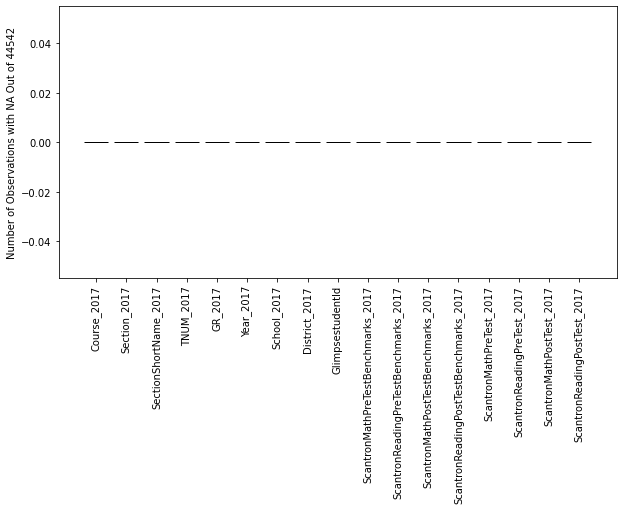

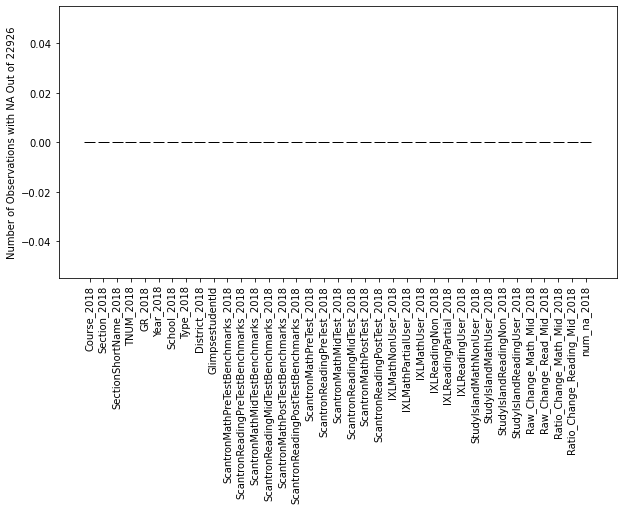

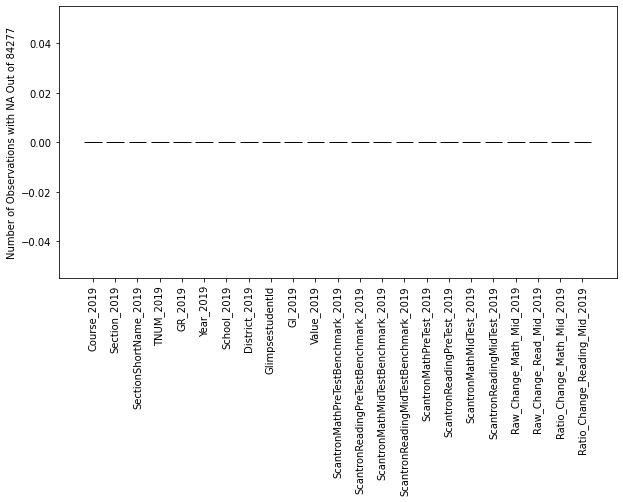

In [23]:
#%% Re-count the number of nan per feature. 
dfs = [df17_grade, df18_grade, df19_grade] # Create list of the dfs

for d in dfs:
    # Count the number of missing vals per feature for current df
    df_cols = list(d)
    col_nan = []
    for c in df_cols:
        val = d[c].isna().sum()
        col_nan.append(val)
    
    # Plot it
    height = col_nan
    bars = df_cols
    y_pos = np.arange(len(bars))
    f, ax = plt.subplots(figsize=(10, 5))
    plt.bar(y_pos, height, color='#fdb827', edgecolor='black')
    plt.xticks(y_pos, bars, rotation=90) # Rotate the bar names
    plt.ylabel("Number of Observations with NA Out of %s" %len(d))
    plt.show() # Show graphic

In [24]:
#%% Join dfs
dfmodel = df18_grade.copy()
dfmodel = dfmodel.merge(df17_grade, how='left', on='GlimpsestudentId')

dfpredict = df19_grade.copy()
dfpredict = dfpredict.merge(df18_grade, how='left', on='GlimpsestudentId')

# Save it
dfmodel.to_csv("Morgan_df_model.csv")
dfpredict.to_csv("Morgan_df_predict.csv")

#%% Join dfs
df_all = df19_grade.copy()
df_all = df_all.merge(df18_grade, how='outer', on='GlimpsestudentId')
df_all = df_all.merge(df17_grade, how='outer', on='GlimpsestudentId')

# Save it
df_all.to_csv('Morgan_all.csv')

# Feature Engineering & Extraction

In [ ]:
#%% Load in data
#from google.colab import files
#files.upload()
data_raw = pd.read_csv('Morgan_all.csv', low_memory=False)
data_raw = data_raw.drop('Unnamed: 0', axis=1)
df_specific = data_raw.copy()
data_cols = list(df_specific)

In [25]:
df_specific = df_all.copy()
data_cols = list(df_specific)
data_cols

['Course_2019',
 'Section_2019',
 'SectionShortName_2019',
 'TNUM_2019',
 'GR_2019',
 'Year_2019',
 'School_2019',
 'District_2019',
 'GlimpsestudentId',
 'GI_2019',
 'Value_2019',
 'ScantronMathPreTestBenchmark_2019',
 'ScantronReadingPreTestBenchmark_2019',
 'ScantronMathMidTestBenchmark_2019',
 'ScantronReadingMidTestBenchmark_2019',
 'ScantronMathPreTest_2019',
 'ScantronReadingPreTest_2019',
 'ScantronMathMidTest_2019',
 'ScantronReadingMidTest_2019',
 'Raw_Change_Math_Mid_2019',
 'Raw_Change_Read_Mid_2019',
 'Ratio_Change_Math_Mid_2019',
 'Ratio_Change_Reading_Mid_2019',
 'Course_2018',
 'Section_2018',
 'SectionShortName_2018',
 'TNUM_2018',
 'GR_2018',
 'Year_2018',
 'School_2018',
 'Type_2018',
 'District_2018',
 'ScantronMathPreTestBenchmarks_2018',
 'ScantronReadingPreTestBenchmarks_2018',
 'ScantronMathMidTestBenchmarks_2018',
 'ScantronReadingMidTestBenchmarks_2018',
 'ScantronMathPostTestBenchmarks_2018',
 'ScantronReadingPostTestBenchmarks_2018',
 'ScantronMathPreTest_20

In [26]:
#%% Add in growth columns to be predicted
df_specific['Math_Growth_Percentage_2017'] = (df_specific['ScantronMathPostTest_2017'] - df_specific['ScantronMathPreTest_2017']) / (df_specific['ScantronMathPreTest_2017'])
df_specific['Reading_Growth_Percentage_2017'] = (df_specific['ScantronReadingPostTest_2017'] - df_specific['ScantronReadingPreTest_2017']) / (df_specific['ScantronReadingPreTest_2017'])

df_specific['Math_Growth_Percentage_2018'] = (df_specific['ScantronMathPostTest_2018'] - df_specific['ScantronMathPreTest_2018']) / (df_specific['ScantronMathPreTest_2018'])
df_specific['Reading_Growth_Percentage_2018'] = (df_specific['ScantronReadingPostTest_2018'] - df_specific['ScantronReadingPreTest_2018']) / (df_specific['ScantronReadingPreTest_2018'])

In [27]:
#%% Clean-up ScantronMathPreTest_2019
df_specific.ScantronMathPreTest_2019.unique() # See what we're working with
df_specific.ScantronMathPreTest_2019 = df_specific.ScantronMathPreTest_2019.str.extract('(\d+)', expand=False) # Remove all letters that were sumehow appended to numbers
df_specific.ScantronMathPreTest_2019 = df_specific.ScantronMathPreTest_2019.fillna('0') # fill all nans with 0
df_specific.ScantronMathPreTest_2019 = df_specific.ScantronMathPreTest_2019.astype(int) # change the col to int type

In [28]:
#%% Add in growth columns as features (e.g., 'brain-drain')
df_specific['Math_scantron_change_1718'] = (df_specific['ScantronMathPreTest_2018'] - df_specific['ScantronMathPostTest_2017'])
df_specific['Reading_scantron_change_1718'] = (df_specific['ScantronReadingPreTest_2018'] - df_specific['ScantronReadingPostTest_2017'])
df_specific['Math_scantron_change_1819'] = (df_specific['ScantronMathPreTest_2019'] - df_specific['ScantronMathPostTest_2018'])
df_specific['Reading_scantron_change_1819'] = (df_specific['ScantronReadingPreTest_2019'] - df_specific['ScantronReadingPostTest_2018'])

df_specific = df_specific.replace([np.inf, -np.inf], np.nan)

In [29]:
#%% Return the quartiles to create growth categories
print(df_specific.Math_Growth_Percentage_2017.describe(), "\n")
print(df_specific.Reading_Growth_Percentage_2017.describe(), "\n")

count    2.869899e+06
mean     1.351844e-01
std      8.198151e-02
min     -3.373403e-01
25%      9.724913e-02
50%      1.428571e-01
75%      1.731225e-01
max      1.646903e+00
Name: Math_Growth_Percentage_2017, dtype: float64 

count    2.869899e+06
mean    -2.367927e-02
std      8.176210e-02
min     -2.888476e-01
25%     -6.909789e-02
50%     -4.052045e-02
75%      7.961783e-03
max      1.162651e+00
Name: Reading_Growth_Percentage_2017, dtype: float64 



In [30]:
#%% Create math growth categories
growth_cat = []
for i in list(range(0, len(df_specific))):
    if df_specific.Math_Growth_Percentage_2017[i] <= 0.09723461:
        growth_cat.append(0)
    elif (df_specific.Math_Growth_Percentage_2017[i] > 0.09723461) & (df_specific.Math_Growth_Percentage_2017[i] <= 0.1428571):
        growth_cat.append(1)
    elif (df_specific.Math_Growth_Percentage_2017[i] > 0.1428571) & (df_specific.Math_Growth_Percentage_2017[i] <= 0.1718815):
        growth_cat.append(2)
    else:
        growth_cat.append(3)
df_specific['growth_cat_math_2017'] = growth_cat
df_specific.growth_cat_math_2017.describe()

count    2.910237e+06
mean     1.600014e+00
std      1.125927e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: growth_cat_math_2017, dtype: float64

In [31]:
#%% Create reading growth categories
growth_cat = []
for i in list(range(0, len(df_specific))):
    if df_specific.Reading_Growth_Percentage_2017[i] <= -0.06577917:
        growth_cat.append(0)
    elif (df_specific.Reading_Growth_Percentage_2017[i] > -0.06577917) & (df_specific.Reading_Growth_Percentage_2017[i] <= -0.04052045):
        growth_cat.append(1)
    elif (df_specific.Reading_Growth_Percentage_2017[i] > -0.04052045) & (df_specific.Reading_Growth_Percentage_2017[i] <= 0.01190476):
        growth_cat.append(2)
    else:
        growth_cat.append(3)
df_specific['growth_cat_read_2017'] = growth_cat
df_specific.growth_cat_read_2017.describe()

In [32]:
#%% Return the quartiles to create growth categories
print(df_specific.Math_Growth_Percentage_2018.describe(), "\n")
print(df_specific.Reading_Growth_Percentage_2018.describe(), "\n")

count    2.705141e+06
mean     7.034296e-02
std      6.538141e-02
min     -1.913793e-01
25%      3.144394e-02
50%      6.371406e-02
75%      9.924306e-02
max      1.651185e+00
Name: Math_Growth_Percentage_2018, dtype: float64 

count    2.705141e+06
mean     6.936583e-02
std      9.374592e-02
min     -2.257218e-01
25%      1.338367e-02
50%      5.447595e-02
75%      1.054913e-01
max      1.663948e+00
Name: Reading_Growth_Percentage_2018, dtype: float64 



In [33]:
#%% Create math growth categories
growth_cat = []
for i in list(range(0, len(df_specific))):
    if df_specific.Math_Growth_Percentage_2018[i] <= 0.0314439:
        growth_cat.append(0)
    elif (df_specific.Math_Growth_Percentage_2018[i] > 0.0314439) & (df_specific.Math_Growth_Percentage_2018[i] <= 0.06371406):
        growth_cat.append(1)
    elif (df_specific.Math_Growth_Percentage_2018[i] > 0.06371406) & (df_specific.Math_Growth_Percentage_2018[i] <= 0.09924306):
        growth_cat.append(2)
    else:
        growth_cat.append(3)
df_specific['growth_cat_math_2018'] = growth_cat
df_specific.growth_cat_math_2018.describe()

count    2.910237e+06
mean     1.606515e+00
std      1.144057e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: growth_cat_math_2018, dtype: float64

In [34]:
#%% Create reading growth categories
growth_cat = []
for i in list(range(0, len(df_specific))):
    if df_specific.Reading_Growth_Percentage_2018[i] <= 0.01338367:
        growth_cat.append(0)
    elif (df_specific.Reading_Growth_Percentage_2018[i] > 0.01338367) & (df_specific.Reading_Growth_Percentage_2018[i] <= 0.05447595):
        growth_cat.append(1)
    elif (df_specific.Reading_Growth_Percentage_2018[i] > 0.05447595) & (df_specific.Reading_Growth_Percentage_2018[i] <= 0.1054913):
        growth_cat.append(2)
    else:
        growth_cat.append(3)
df_specific['growth_cat_read_2018'] = growth_cat
df_specific.growth_cat_read_2018.describe()

count    2.910237e+06
mean     1.605859e+00
std      1.144814e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: growth_cat_read_2018, dtype: float64

In [35]:
#%% Save new df
list(df_specific)
df_specific.to_csv('Morgan_all.csv')

In [ ]:
#%% If picking up mid-script. 
df_specific = pd.read_csv("Morgan_all.csv", low_memory=False)
df_specific = df_specific.drop(['Unnamed: 0'], axis=1)
list(df_specific)

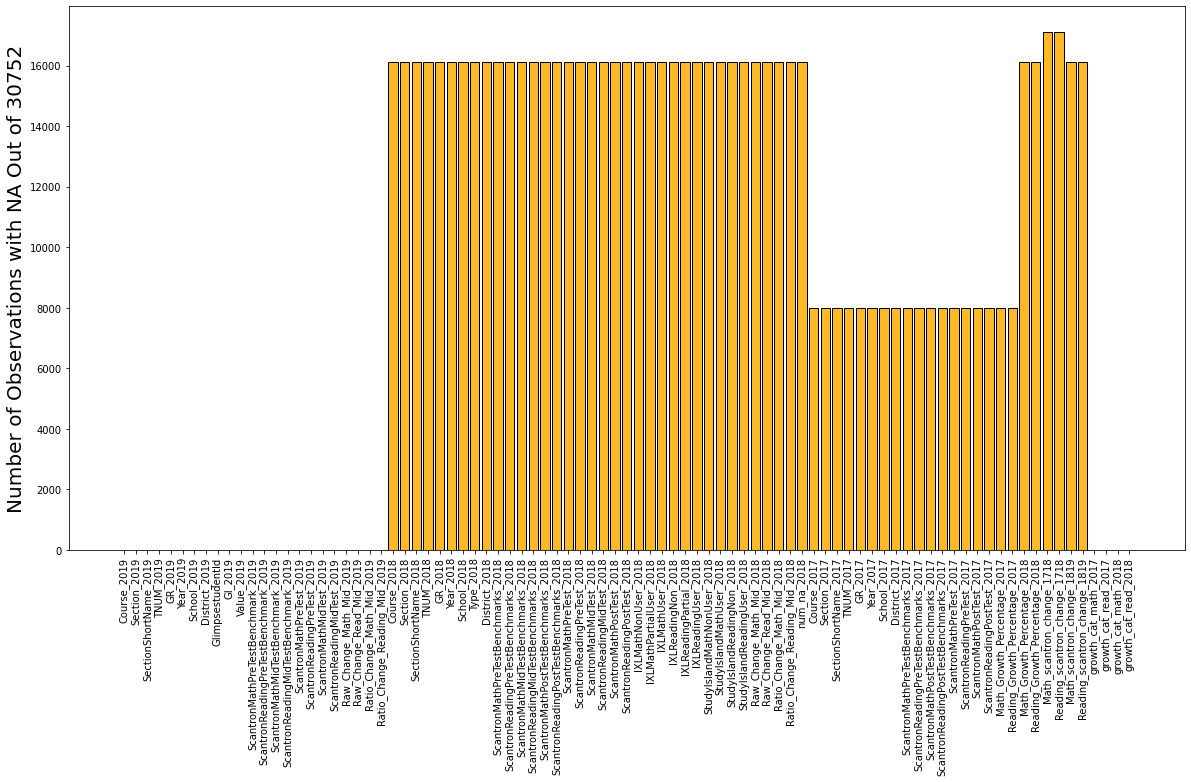

In [52]:
#%% Count and plot the number of nan per feature. 
data_cols = list(df_specific)
col_nan = []
for i in data_cols:
    val = df_specific[i].isna().sum()
    col_nan.append(val)

height = col_nan
bars = list(df_specific)
y_pos = np.arange(len(bars))

plt.figure(figsize=(20, 10))
plt.bar(y_pos, height, color='#fdb827', edgecolor='black')
plt.xticks(y_pos, bars, rotation=90) # Rotation of the bars names
plt.ylabel("Number of Observations with NA Out of %s" %len(df_specific), fontsize=20)
plt.show() # Show graphic

In [60]:
#%% Dealing with missing 2019 values
df_specific = df_specific.drop_duplicates(subset=['GlimpsestudentId', 'TNUM_2019', \
                                                  'SectionShortName_2019', 'TNUM_2018', \
                                                  'SectionShortName_2018', 'TNUM_2017', \
                                                  'SectionShortName_2017']) # Dropping duplicates

# Drop 2019 NA cols
df_specific = df_specific.dropna(subset=['TNUM_2019'])

df_specific = df_specific.dropna()
len(df_specific.GlimpsestudentId.unique())

2094

In [61]:
#%% Identify which columns are categorical and we'll need to recode as ints for ML algorithms
data_types = df_specific.dtypes
data_types

Course_2019                      object
Section_2019                     object
SectionShortName_2019            object
TNUM_2019                        object
GR_2019                         float64
                                 ...   
Reading_scantron_change_1819    float64
growth_cat_math_2017              int64
growth_cat_read_2017              int64
growth_cat_math_2018              int64
growth_cat_read_2018              int64
Length: 87, dtype: object

In [ ]:
#%% Recode categorical columns as numerical and save dictionaries
cat_cols =['Course_2017', 'Name_2017', 'School_2017', 'District_2017', \
           'Name_2018', 'District_2018', 'LetterGrade_2018']

# Create dictionaries for the specific columns that we'll need later
# 2018 AND 2019 COURSE NAMES
df_specific['Course_2018'] = df_specific['Course_2018'].astype('category')    
course_2018 = dict(enumerate(df_specific['Course_2018'].cat.categories))
df_specific['Course_2018'] = df_specific['Course_2018'].cat.codes

#df_specific['Course_2019'] = df_specific['Course_2019'].astype('category')    
#course_2019 = dict(enumerate(df_specific['Course_2019'].cat.categories))
#df_specific['Course_2019'] = df_specific['Course_2019'].cat.codes

# TEACHERS
#df_specific['TeacherNumber_2019'] = df_specific['TeacherNumber_2019'].astype('category')
#teacher_dict = dict(enumerate(df_specific['TeacherNumber_2019'].cat.categories))
#df_specific['TeacherNumber_2019'] = df_specific['TeacherNumber_2019'].cat.codes

# SCHOOLS
df_specific['School_2018'] = df_specific['School_2018'].astype('category')
school_dict = dict(enumerate(df_specific['School_2018'].cat.categories))
df_specific['School_2018'] = df_specific['School_2018'].cat.codes

for i in cat_cols:
    df_specific[i] = df_specific[i].astype('category')
    d = dict(enumerate(df_specific[i].cat.categories))
    df_specific[i] = df_specific[i].astype('category')
    df_specific[i] = df_specific[i].cat.codes

data_types = df_specific.dtypes
data_types

# Create feature and outcome dfs

In [ ]:
# Outcomes for predicting
list(df_specific)
outcomes = ['MaapELAPostBenchmarks_2018','MaapMathPostBenchmarks_2018',\
            'MaapELAPostProficiency_2018','MaapMathPostProficiency_2018',\
            'MaapELAPost_2018','MaapMathPost_2018','MaapMath_growth_percent_math_1718',\
            'MaapELA_growth_percent_read_1718','growth_cat_math_1718',\
            'growth_cat_read_1718']
targets = df_specific.loc[:, outcomes].values
targets = pd.DataFrame(targets)
targets.columns = outcomes
dropCols = outcomes.append('GlimpsestudentId')

# Create df of features as predictors
features = df_specific.drop(outcomes, axis=1)

In [ ]:
#%% Feature Scaling
from sklearn.preprocessing import MinMaxScaler
feats_rescaled = MinMaxScaler().fit_transform(features) # scale features 

# label columns of rescaled features df
feats_rescaled = pd.DataFrame(feats_rescaled)
featCols = list(features)
feats_rescaled.columns = featCols

# Regression Predictions

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc

In [ ]:
#%% Define functions
def lin_metrics(x, y):
    ''' Prints four common metrics for evaluating regression predictions. '''
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(x, y), 4))
    print('Mean Squared Error:', round(metrics.mean_squared_error(x, y), 4))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(x, y)), 4))
    print('R^2:,', round(r2_score(y_test, y_pred), 4))

def plot_scatter(x, y, xmin=None, xmax=None, ymin=None, ymax=None):
    '''Plots simple scatter plot of two datasets. We'll use to plot scatter of residuals.'''
    matplotlib.rc('figure', figsize=(7, 7))
    plt.scatter(y_test, y_pred, cmap='viridis', alpha=0.2)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Observed', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    return plt.show()

def plot_residuals(x, y):
    '''Plot historgram of residuals.'''
    residuals = x - y
    plt.hist(residuals, bins=50, color='black')
    plt.xlabel('Residual')
    plt.ylabel('Num Observations')
    plt.show()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Math outcomes. 
mathOutc = targets['MaapMathPost_2018']
from sklearn.decomposition import PCA
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test)
plot_residuals(y_test, y_pred)
feature_importances = pd.DataFrame(regressor.coef_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
print(round(feature_importances, 5))
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 7))

In [ ]:
#%% Reading outcomes. 
readOutc = targets['MaapELAPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
lin_metrics(y_test, y_pred)
plot_scatter(y_pred, y_test, xmin=300, ymin=300, xmax=600, ymax=600)
plot_residuals(y_test, y_pred)
feature_importances = pd.DataFrame(regressor.coef_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
print(round(feature_importances, 5))
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 7))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Math outcomes
mathOutc = targets['MaapMathPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("Max R^2:", max(rr_acc))

In [ ]:
#%% Reading outcomes
readOutc = targets['MaapELAPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
rr_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = Ridge(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    r_2 = r2_score(y_test, pred_test_rr)
    rr_acc.append(r_2)
plt.plot(rr_acc, marker='o', color='black')
print("Max R^2:", max(rr_acc))

## Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso

# Math outcomes
mathOutc = targets['MaapMathPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='black')
print("Max R^2:", max(lasso_acc))

In [ ]:
#%% Reading outcomes
readOutc = targets['MaapELAPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
lasso_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_lasso = Lasso(alpha=i)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)
    pred_test_lasso= model_lasso.predict(X_test)
    r_2 = r2_score(y_test, pred_test_lasso)
    lasso_acc.append(r_2)
plt.plot(lasso_acc, marker='o', color='blue')
print("Max R^2:", max(lasso_acc))

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
# Math outcomes
mathOutc = targets['MaapMathPost_2018']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='black')
print("Max R^2:", max(elst_acc))

In [ ]:
#%% Reading outcomes
readOutc = targets['MaapELAPost_2018']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
elst_acc = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    pred_test_enet= model_enet.predict(X_test)
    r_2 = r2_score(y_test, pred_test_enet)
    elst_acc.append(r_2)
plt.plot(elst_acc, marker='o', color='blue')
print("Max R^2:", max(elst_acc))

## k-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Math outcomes
mathOutc = targets['MaapMathPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
print("Max R^2:", max(r2_vals))

In [ ]:
#%% Reading outcomes
readOutc = targets['MaapELAPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
r2_vals = []
neighbors = list(range(1, 50))
for i in neighbors:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='blue')
print("Max R^2:", max(r2_vals))

## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

# Math outcomes
mathOutc = targets['MaapMathPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_trimmed, mathOutc, test_size=0.20, random_state = 0)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
print("Max R^2:", max(r2_vals))

In [ ]:
#%% Reading outcomes
readOutc = targets['MaapELAPost_2018']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
r2_vals = []
gamma_range = [0.01, 0.1, 1]
C_range = [1, 10, 100]
for i in C_range:
    for k in gamma_range:
        svr_rbf = SVR(kernel='rbf', C=i, gamma=k, epsilon=0.01)
        svr_rbf.fit(X_train, y_train)
        y_pred = svr_rbf.predict(X_test)
        score = r2_score(y_test, y_pred)
        r2_vals.append(score)
plt.plot(r2_vals, marker='o', color='black')
print("Max R^2:", max(r2_vals))

## Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

# Math outcomes
mathOutc = targets['MaapMathPost_2018']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 0)
MLP_math = MLPRegressor(random_state=649, max_iter=1000)
MLP_math.fit(X_train, y_train)
pred_test_MLPReg_math = MLP_math.predict(X_test)
r_2 = r2_score(y_test, pred_test_MLPReg_math)
print("Max R^2:", r_2)
plot_scatter(pred_test_MLPReg_math, y_test, plt_title='Math')
plot_residuals(y_test, pred_test_MLPReg_math)

In [ ]:
#%% MLP Regressor Reading
readOutc = targets['MaapELAPost_2018']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
MLP_read = MLPRegressor(random_state=649, max_iter=1000)
MLP_read.fit(X_train, y_train)
pred_test_MLPReg_read = MLP_read.predict(X_test)
r_2 = r2_score(y_test, pred_test_MLPReg_read)
print("Max R^2:", r_2)
plot_scatter(pred_test_MLPReg_read, y_test, plt_title='Reading')
plot_residuals(y_test, pred_test_MLPReg_read)

## Build final model to be used for regression predictions

In [ ]:
# Math outcomes
read_cols = ['MaapELAPostBenchmarks_2017','MaapELAPostProficiency_2017',\
             'MaapELAPost_2017','NweaReadingPreBenchmarks_2018',\
             'NweaReadingPostBenchmarks_2018','NweaReadingPre_2018',\
             'NweaReadingPost_2018','nwea2018_Reading_growth_raw',\
             'nwea2018_Reading_growth_percent']

math_feats = feats_rescaled.drop(read_cols, axis=1)

from sklearn.linear_model import ElasticNet
mathOutc = targets['MaapMathPost_2018']
X_train, X_test, y_train, y_test = train_test_split(math_feats, mathOutc, test_size=0.20, random_state = 0)
model_enet_math = ElasticNet(alpha=0.01)
model_enet_math.fit(X_train, y_train)
pred_train_enet_math = model_enet_math.predict(X_train)
y_pred = model_enet_math.predict(X_test)
lin_metrics(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_scatter(y_pred, y_test)
feature_importances = pd.DataFrame(regressor.coef_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
print(round(feature_importances, 5))
feature_importances.plot.barh(rot=0, color='black', figsize=(7, 7))

In [ ]:
# Reading outcomes
math_cols = ['MaapMathPostBenchmarks_2017','MaapMathPostProficiency_2017',\
             'MaapMathPost_2017','nweaMathPreBenchmarks_2018',\
             'NweaMathPostBenchmarks_2018','nweaMathPre_2018',\
             'NweaMathPost_2018','nwea2018_Math_growth_raw',\
             'nwea2018_Math_growth_percent']

read_feats = feats_rescaled.drop(math_cols, axis=1)

readOutc = targets['MaapELAPost_2018']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 0)
model_enet_read = ElasticNet(alpha=0.01)
model_enet_read.fit(X_train, y_train)
pred_train_enet_read = model_enet_read.predict(X_train)
pred_test_enet_read = model_enet_read.predict(X_test)
r_2 = r2_score(y_test, pred_test_enet_read)
print(r_2)
plot_residuals(y_test, pred_test_enet_read)
plot_scatter(pred_test_enet_read, y_test)
feature_importances = pd.DataFrame(regressor.coef_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
print(round(feature_importances, 5))
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 7))

# Proficiency Predictions

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
#%% Define functions
def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y, average='weighted'), 4))
    print('Recall:', round(metrics.recall_score(x, y, average='weighted'), 4))
    print('F1:', round(metrics.f1_score(x, y, average='weighted'), 4))

def plot_cm(x, y):
    plt.subplots(figsize=(12, 10))
    cm = confusion_matrix(x, y)
    df_cm = pd.DataFrame(cm, columns=np.unique(x), index = np.unique(x))
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')# font size
    plt.ylim([0, 4])
    plt.xlabel('Predicted', fontsize=30)
    plt.ylabel('Observed', fontsize=30)

## Grid search for Random Forest Params

In [ ]:
#%% Random Forest
from sklearn.ensemble import RandomForestClassifier
# Math outcomes
mathOutc = targets['ScantronMathMidBenchmarks_2019']
pca = PCA(0.95) # instance of PCA model accounting for 95% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 649)
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

In [ ]:
#%% Reading Outcomes
readOutc = targets['ScantronReadingMidBenchmarks_2019']
pca = PCA(0.95) # instance of PCA model accounting for 95% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 649)
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

## Build final prediction model to be used for proficiency classifications

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Math outcomes
mathOutc = targets['MaapMathPostProficiency_2018']
#math_feats = feats_rescaled.drop(['NweaReadingPre_2018','NweaReadingMid_2018',\
#                                  'GMAELA_1617', 'Reading_Growth_Percentage_1617', \
#                                  'growth_cat_read_1617', 'GMAELA_2016', 'GMAELA_2017'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(math_feats, mathOutc, test_size=0.20, random_state = 649)
classifier = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier.fit(X_train, y_train)
pred_train= classifier.predict(X_train)
pred_test= classifier.predict(X_test)
acc_val = metrics.accuracy_score(pred_test, y_test)
print("Accuracy:", acc_val)
f1_val = f1_score(pred_test, y_test)
print("F1:", f1_val)
bin_metrics(pred_test, y_test)
plot_cm(pred_test, y_test)
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

In [ ]:
#%% Reading Outcomes
readOutc = targets['MaapELAPostProficiency_2018']
#read_feats = feats_rescaled.drop(['NweaMathPre_2018','NweaMathMid_2018',\
#                                  'GMAMath_1617', 'Math_Growth_Percentage_1617', \
#                                  'growth_cat_math_1617', 'GMAMath_2016', 'GMAMath_2017'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(read_feats, readOutc, test_size=0.20, random_state = 649)
classifier = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier.fit(X_train, y_train)
pred_train= classifier.predict(X_train)
pred_test= classifier.predict(X_test)
acc_val = metrics.accuracy_score(pred_test, y_test)
print("Accuracy:", acc_val)
f1_val = f1_score(pred_test, y_test)
print("F1:", f1_val)
bin_metrics(pred_test, y_test)
plot_cm(pred_test, y_test)
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
print(round(feature_importances, 5))
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

# Growth Category Predictions (Multi-Class)

## Grid search for RF params

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Math outcomes
mathOutc = targets['growth_cat_math_1718']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 649)
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test, average='weighted')
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
readOutc = targets['growth_cat_read_1718']
pca = PCA(0.95) # instance of PCA model accounting for 05% of the variance
principalComponents = pca.fit_transform(features) # fit PCA to train set
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 649)
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test, average='weighted')
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

## Build final prediction model to be used for growth category predictions

In [ ]:
# Math outcomes
list(targets)
mathOutc = targets['growth_cat_math_1718']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, mathOutc, test_size=0.20, random_state = 649)
classifier_math = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier_math.fit(X_train, y_train)
pred_train_math = classifier_math.predict(X_train)
pred_test_math = classifier_math.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test_math)
f1_val = f1_score(y_test, pred_test_math, average='weighted')
print("Accuracy:", round(acc_val, 2))
print('F1:', round(f1_val, 2))
feature_importances = pd.DataFrame(classifier_math.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier_math.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

In [ ]:
#%% Math model without reading features
reading_feats = ['NweaReadingMid_2018', 'NweaReadingPre_2018', 'GMAELA_2016', \
                 'GMAELA_1617', 'GMAELA_2017', 'Reading_Growth_Percentage_1617', \
                 'growth_cat_read_1617']

math_feats = feats_rescaled.drop(reading_feats, axis=1)

mathOutc = targets['growth_cat_math_1718']
X_train, X_test, y_train, y_test = train_test_split(math_feats, mathOutc, test_size=0.20, random_state = 649)
classifier_math_only = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier_math_only.fit(X_train, y_train)
pred_train_math = classifier_math_only.predict(X_train)
pred_test_math = classifier_math_only.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test_math)
f1_val = f1_score(y_test, pred_test_math, average='weighted')
print("Accuracy:", round(acc_val, 2))
print('F1:', round(f1_val, 2))
feature_importances = pd.DataFrame(classifier_math_only.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances[-40:].plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier_math_only.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

In [ ]:
# Reading outcomes
readOutc = targets['growth_cat_read_1718']
X_train, X_test, y_train, y_test = train_test_split(feats_rescaled, readOutc, test_size=0.20, random_state = 649)
classifier_read = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier_read.fit(X_train, y_train)
pred_train_read = classifier_read.predict(X_train)
pred_test_read = classifier_read.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test_read)
f1_val = f1_score(y_test, pred_test_read, average='weighted')
print("Accuracy:", round(acc_val, 2))
print('F1:', round(f1_val, 2))
feature_importances = pd.DataFrame(classifier_read.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances.plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier_read.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

In [ ]:
#%% Reading model without reading features
math_feats = ['NweaMathMid_2018', 'NweaMathPre_2018', 'GMAMath_2016', \
                 'GMAMath_1617', 'GMAMath_2017', 'Math_Growth_Percentage_1617', \
                 'growth_cat_math_1617']

read_feats = feats_rescaled.drop(math_feats, axis=1)

mathOutc = targets['growth_cat_math_1718']
X_train, X_test, y_train, y_test = train_test_split(read_feats, mathOutc, test_size=0.20, random_state = 649)
classifier_reading_only = RandomForestClassifier(n_estimators=10, max_depth=100)
classifier_reading_only.fit(X_train, y_train)
pred_train_math = classifier_reading_only.predict(X_train)
pred_test_math = classifier_reading_only.predict(X_test)
acc_val = metrics.accuracy_score(y_test, pred_test_math)
f1_val = f1_score(y_test, pred_test_math, average='weighted')
print("Accuracy:", round(acc_val, 2))
print('F1:', round(f1_val, 2))
feature_importances = pd.DataFrame(classifier_reading_only.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=True)
feature_importances.plot.barh(rot=0, color='black', figsize=(7, 15))
feature_importances = pd.DataFrame(classifier_reading_only.feature_importances_, index = X_train.columns, \
                                    columns=['importance']).sort_values('importance',ascending=False)
print(round(feature_importances, 5))

# Creating Teacher Predictions

In [ ]:
# Create copy of working df as we start to play around
df_recommend = df_specific.drop_duplicates(subset=['GlimpsestudentId', 'TeacherNumber_2019'])

In [ ]:
# Save current raw vals of cols we need later
all_pred_GID = df_recommend['GlimpsestudentId'].to_list()
all_tnum = df_recommend['TeacherNumber_2019'].to_list()
all_courses = df_recommend['TeacherNumber_2019'].to_list()

In [ ]:
# Drop 2016 data so we can shift years. 
df_recommend = df_recommend.drop(['Course_2016','CourseNumber_2016',\
                                  'SectionNumber_2016','TeacherNumber_2016',\
                                  'GR_2016','SchoolId_2016','GlimpsestudentId',\
                                  'GMAELA_2016','GMAMath_2016', \
                                  'growth_cat_math_1617','growth_cat_read_1617', \
                                  'Math_Growth_Percentage_1617','Reading_Growth_Percentage_1617',\
                                  'GMAMath_1617','GMAELA_1617'], axis=1)

In [ ]:
#%% Create new cols 
list(df_recommend)
cols_rec = ['Course_2016','CourseNumber_2016', 'SectionName_2016','SectionNumber_2016',\
            'TeacherNumber_2016','GR_2016','SchoolName_2016','GMAELA_2016',\
            'GMAMath_2016','Course_2017','CourseNumber_2017','SectionName_2017',\
            'SectionNumber_2017','TeacherNumber_2017','GR_2017','SchoolName_2017',\
            'NweaReadingPre_2017','NweaReadingMid_2017','NweaReadingPost_2017',\
            'NweaMathPre_2017','NweaMathMid_2017','NweaMathPost_2017','GMAELA_2017',\
            'GMAMath_2017','Course_2018','CourseNumber_2018','SectionName_2018',\
            'SectionNumber_2018','TeacherNumber_2018','GR_2018','SchoolName_2018',\
            'SchoolId_2018','NweaReadingPre_2018','NweaReadingMid_2018','NweaMathPre_2018',\
            'NweaMathMid_2018','GMAMath_1617','GMAELA_1617',\
            'Math_Growth_Percentage_1617','Reading_Growth_Percentage_1617',\
            'growth_cat_math_1617','growth_cat_read_1617']

df_recommend.columns = cols_rec # Assign names above to the new df

In [ ]:
#%% Drop cols so the features match the models
list(df_recommend)

df_recommend = df_recommend.rename(columns={'SchoolId_2016':'SchoolName_2016'})

df_recommend = df_recommend.drop(['SectionName_2016', 'NweaReadingPre_2018',\
                                  'NweaReadingMid_2017','NweaReadingPost_2017',\
                                  'NweaMathPre_2017','NweaMathMid_2017',\
                                  'NweaMathPost_2017', 'SchoolId_2018'], axis=1)
print(len(list(feats_rescaled)))
print(len(list(df_recommend)))

In [ ]:
#%% Rename all the 2018 variables as 2017 for the saved model. 
ldr = list(df_recommend)
lfs = list(feats_rescaled)

In [ ]:
#%% Feature Scaling
from sklearn.preprocessing import MinMaxScaler
rec_rescaled = MinMaxScaler().fit_transform(df_recommend) # scale features 

# Label columns of rescaled features df
df_recommend = pd.DataFrame(df_recommend)
featCols = list(df_recommend)
rec_rescaled = pd.DataFrame(rec_rescaled)
rec_rescaled.columns = featCols

In [ ]:
#%% Make regression predictions
math_pred = model_enet_math.predict(rec_rescaled)
read_pred = model_enet_read.predict(rec_rescaled)

In [ ]:
#%% Make growth category predictions 
math_pred_gr = classifier_math.predict(rec_rescaled)
read_pred_gr = classifier_read.predict(rec_rescaled)

In [ ]:
#%% Add predicted scores to the created back to the original dfs. 
rec_rescaled['GlimpsestudentID'] = np.array(all_pred_GID)
rec_rescaled['TeacherNumber_2019'] = np.array(all_tnum)
rec_rescaled['SectionName_2019'] = np.array(all_courses)
rec_rescaled['Predicted_Raw_Math'] = np.array(math_pred)
rec_rescaled['Predicted_Raw_Reading'] = np.array(read_pred)
#rec_rescaled['Predicted_Growth_Cat_Math'] = np.array(math_pred_gr)
#rec_rescaled['Predicted_Growth_Cat_Reading'] = np.array(read_pred_gr)

#%% Save resulting df
rec_rescaled.to_csv("Morgan_all_predictions.csv")

In [ ]:
#%% Unpack categorical variables from numbers back to the names
#rec_rescaled = rec_rescaled.reset_index()

# Empty lists for storing vals
tx_num = []
sch_name = []
crs_name = []
indices = list(range(len(rec_rescaled)))

# Use the dictionaries created above to decode vals and store in above lists
for i in indices:
    num = teacher_dict.get(rec_rescaled['TeacherNumber_2019'][i])
    tx_num.append(num)
    name = school_dict.get(rec_rescaled['SchoolName_2018'][i])
    sch_name.append(name)
    course = course_2019.get(rec_rescaled['Course_2018'][i])
    crs_name.append(course)

In [ ]:
# Add these cols to the df_all dataframe
rec_rescaled['Teacher_Number'] = tx_num
rec_rescaled['School_Name'] = sch_name
rec_rescaled['Course'] = crs_name

#%% Save the df
rec_rescaled.to_csv('Morgan_all_predictions.csv')

In [ ]:
#%% Trim way the unnecessary cols to just Student ID, Tx ID, School, Scores, and Rankings
final_recommendations = rec_rescaled[['GlimpsestudentID','Teacher_Number', \
                                      'Predicted_Raw_Math','Predicted_Raw_Reading']]

final_recommendations = final_recommendations.rename(columns={'GlimpsestudentID':'StudentStateID'})

print(len(final_recommendations))
final_recommendations = final_recommendations.drop_duplicates()
print(len(final_recommendations))
final_recommendations.head(30) # Take a peek and make sure it looks right

In [ ]:
#%% Keep only the predictions where Math or reading classes are involved
final_recommendations.Course.unique() # Print the unique vals

cols_keep = ['Math Grade 6', 'Math Lab','English LA 6','Math Grade 5', \
             'English LA 5','English LA 4', 'Math Grade 4']

In [ ]:
# Keep only rows with math or reading classes
final_recommendations = final_recommendations[final_recommendations['Course'].isin(cols_keep)]

final_recommendations.Course.unique() # Print the unique vals

In [ ]:
#%% Drop course col and save the df
final_recommendations.to_csv('Morgan_predictions.csv')